In [6]:
%config IPCompleter.greedy=True
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import fmin_bfgs

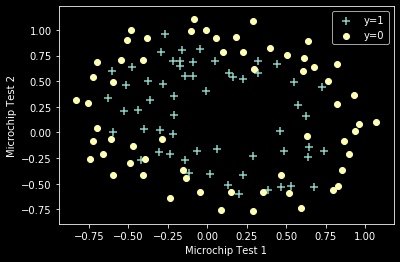

In [7]:
data = pd.read_csv('machine-learning-ex2-master\ex2\ex2data2.txt', header = None)

exams= data.loc[:,0:2]
X = data.loc[:,0:1]
y = data.loc[:,2]
m = y.size
pos = X.loc[y==1]
neg = X.loc[y==0]

ones = np.ones((m,1))
X = np.hstack((ones,X))
theta = np.zeros((28,1))
y = y[:,np.newaxis]

plt.scatter(pos[0],pos[1], marker='+' ,s=60, label="y=1")
plt.scatter(neg[0],neg[1], marker='o' , label='y=0')
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend(loc='best')

In [11]:
def increaseFeatures(X1, X2):
    out = np.ones((m,1))
    for i in range(1,6):
        for j in range(0,i):
            out[:,:-1] = (np.power(X1,i-j))*(np.power(X2,j))
    return out

            


In [13]:
print(increaseFeatures(X[0],X[1]))

ValueError: could not broadcast input array from shape (3) into shape (118,0)

In [8]:
def sigmoid(x):
    return(1 / (1 + np.exp(-x)))

In [9]:
def costFunction(theta, X, y):
    hx = sigmoid(X.dot(theta))

    J = -1/m*(np.log(hx).T.dot(y)+np.log(1-hx).T.dot(1-y))

    return J

In [10]:
def gradient(theta,X, y):

    # fmin_bfgs gives one dim theta so need to add one more dim
    temp = sigmoid(np.dot(X, theta[...,np.newaxis]))
    temp = temp-y
    temp = np.dot(X.T, temp)
    theta = (1/m) * temp
    return theta.flatten()